You may make some explorations here.

In [2]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

input = np.arange(1, 26).reshape(5, 5)
input.strides

(40, 8)

In [1]:
import numpy as np
from struct import unpack
import gzip
import matplotlib.pyplot as plt

In [4]:
path = r'.\dataset\MNIST\train-images.idx3-ubyte'

with open(path, 'rb') as f:
        magic, num, rows, cols = unpack('>4I', f.read(16))
        imgs=np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 28*28)

print(magic)
print(num)
print(rows)
print(cols)
print(imgs.shape)

2051
60000
28
28
(60000, 784)


In [4]:
imgs[0].max()

255

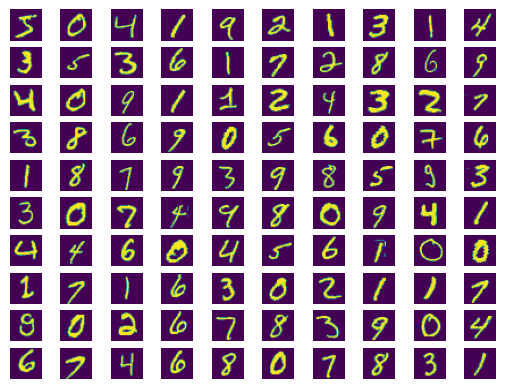

In [5]:
for i in range(100):
    plt.subplot(10,10, i + 1)
    plt.imshow(imgs[i].reshape(rows, cols))
    plt.axis("off")

In [6]:
path = r'.\dataset\MNIST\t10k-labels.idx1-ubyte'

with open(path, 'rb') as f:
        magic, num = unpack('>2I', f.read(8))
        lab = np.frombuffer(f.read(), dtype=np.uint8)

In [7]:
print(lab.shape)
print(lab[0:100])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [8]:
np.matmul(np.zeros((2,3)), np.zeros((3,1))).shape

(2, 1)

In [12]:
X = np.random.randint(0, 9, (1, 2, 4, 4))
grads = np.random.randint(0, 9, (1, 3, 2, 2))
kH = kW = 3
print(f"X:{X}")
print(f"grads:{grads}")

X:[[[[6 1 5 3]
   [4 2 5 7]
   [6 1 7 3]
   [3 7 2 5]]

  [[4 1 3 4]
   [8 0 5 7]
   [0 6 6 8]
   [5 3 5 7]]]]
grads:[[[[4 2]
   [1 2]]

  [[3 0]
   [7 3]]

  [[3 1]
   [6 3]]]]


In [15]:
dW = np.tensordot(grads[:, :, 0, 0], X[:, :, :kH, :kW], axes=([0], [0]))
dW.shape

(3, 2, 3, 3)

In [ ]:
from matplotlib.animation import FuncAnimation

# 假设形状 (depth, width, height, channels)
kernel_4d = np.random.rand(5, 3, 3, 4)  # 示例数据

fig = plt.figure()
im = plt.imshow(kernel_4d[0, :, :, 0], cmap='coolwarm')

def update(frame):
    im.set_data(kernel_4d[frame, :, :, 0])
    return [im]

ani = FuncAnimation(fig, update, frames=kernel_4d.shape[0], interval=500)
plt.title("Depth/Time Dimension Animation")
plt.show()